In [1]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

ImportError: No module named 'preprocessed_mnist'

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd


In [3]:
# Flatten input 
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Parametrize network
n_inputs = X_train.shape[1]*X_train.shape[2]
n_hidden = 200
n_outputs = 10
learning_rate = 0.08

In [4]:
X_train_flat.shape

(50000, 784)

In [5]:
# Create placeholders 
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [6]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z    

In [7]:
with tf.name_scope("ann"):
    hidden = neuron_layer(X, n_hidden, name="hidden",
                           activation=tf.nn.relu)
    #hidden2 = neuron_layer(hidden, n_hidden, name="hidden2",
     #                      activation=tf.nn.relu)
    logits = neuron_layer(hidden, n_outputs, name="outputs")

In [8]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [9]:
with tf.name_scope("train"):
    #optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    optimizer = tf.train.MomentumOptimizer(learning_rate, 0.8)
    #optimizer = tf.train.RMSPropOptimizer(0.015)
    
    training_op = optimizer.minimize(loss)

In [10]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
        

In [11]:
n_epochs = 25
batch_size = 50

0 Train accuracy: 1.0 Test accuracy: 0.9588
1 Train accuracy: 0.96 Test accuracy: 0.9708
2 Train accuracy: 1.0 Test accuracy: 0.973
3 Train accuracy: 1.0 Test accuracy: 0.976
4 Train accuracy: 1.0 Test accuracy: 0.978
5 Train accuracy: 1.0 Test accuracy: 0.9778
6 Train accuracy: 1.0 Test accuracy: 0.9773
7 Train accuracy: 1.0 Test accuracy: 0.9795
8 Train accuracy: 1.0 Test accuracy: 0.9806
9 Train accuracy: 1.0 Test accuracy: 0.9799
10 Train accuracy: 1.0 Test accuracy: 0.9805
11 Train accuracy: 1.0 Test accuracy: 0.9826
12 Train accuracy: 1.0 Test accuracy: 0.9822
13 Train accuracy: 1.0 Test accuracy: 0.9832
14 Train accuracy: 1.0 Test accuracy: 0.9822
15 Train accuracy: 1.0 Test accuracy: 0.9831
16 Train accuracy: 1.0 Test accuracy: 0.9835
17 Train accuracy: 1.0 Test accuracy: 0.9821
18 Train accuracy: 1.0 Test accuracy: 0.9826
19 Train accuracy: 1.0 Test accuracy: 0.9827
20 Train accuracy: 1.0 Test accuracy: 0.9829
21 Train accuracy: 1.0 Test accuracy: 0.9828
22 Train accuracy: 1.0

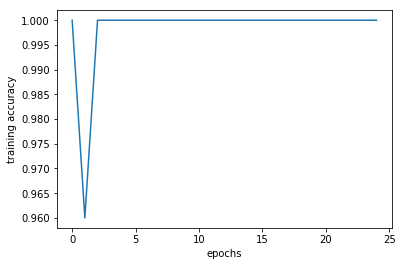

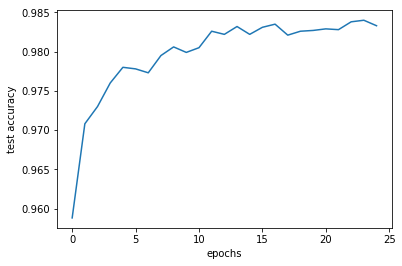

In [12]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()
acc_trains=[]
acc_tests=[]
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(X_train.shape[0] // batch_size):
            ind = np.random.choice(X_train_flat.shape[0], batch_size)
            X_batch = X_train_flat[ind, :]
            y_batch = y_train[ind]
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test_flat,
                                            y: y_test})
        acc_trains.append(acc_train)
        acc_tests.append(acc_test)
        
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

# plot the accuracy of training
plt.plot(acc_trains)
plt.ylabel('training accuracy')
plt.xlabel('epochs')
plt.show()

# plot the accuracy of test
plt.plot(acc_tests)
plt.ylabel('test accuracy')
plt.xlabel('epochs')
plt.show()

Test accuracy over 98% has been achieved.